In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

In [76]:
log_return_df = pd.read_csv('../data/full_log_return.csv', index_col='Date', parse_dates=True, dayfirst=True)

In [77]:
apollo = log_return_df['APOLLOHOSP']

In [78]:
x_list = np.linspace(apollo.min(), apollo.max(), 100)

In [79]:
df, loc, scale = t.fit(apollo)

In [82]:
y_list = t.pdf(x_list, df, loc, scale)

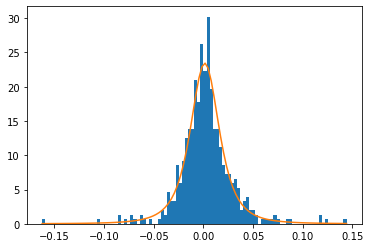

In [83]:
plt.hist(apollo, bins=100, density=True)
plt.plot(x_list, y_list)

In [84]:
class myt:
    def __init__(self, df):
        self.df = df
        
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

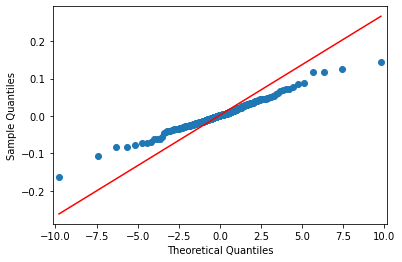

In [85]:
sm.qqplot(apollo, dist=myt(df), line='s');